In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading and Initial Look

In [32]:
pip install ucimlrepo

In [33]:
from ucimlrepo import fetch_ucirepo

cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

print(cdc_diabetes_health_indicators.metadata)

print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

Pandas Dataframe
- Count of data

In [34]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

df = pd.concat([X, y], axis=1)

print(df)
print(f"How many rows and columns: {df.shape}")

        HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            1         1          1   40       1       0   
1            0         0          0   25       1       0   
2            1         1          1   28       0       0   
3            1         0          1   27       0       0   
4            1         1          1   24       0       0   
...        ...       ...        ...  ...     ...     ...   
253675       1         1          1   45       0       0   
253676       1         1          1   18       0       0   
253677       0         0          1   28       0       0   
253678       1         0          1   23       0       0   
253679       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                          0             0       0        1  ...            0   
1                          0             1       0        0  ...            1   
2                          0        

Any null values?

In [35]:
df.isnull().sum()

,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


Features are categorical and numerical (age and BMI are the only numerical)

GenHlth (1-5 scale), MentHlt (1-30), PhysHlth (1-30), Education (1-6), Income (1-8)

In [36]:
print(df.dtypes)

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype: object


In [37]:
print(df.columns.tolist())

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_binary']


Classification is binary encoded 0 and 1 (0 being no diabetes, 1 being diabetes)

##Visualizations
Something to note: this dataset is imbalanced

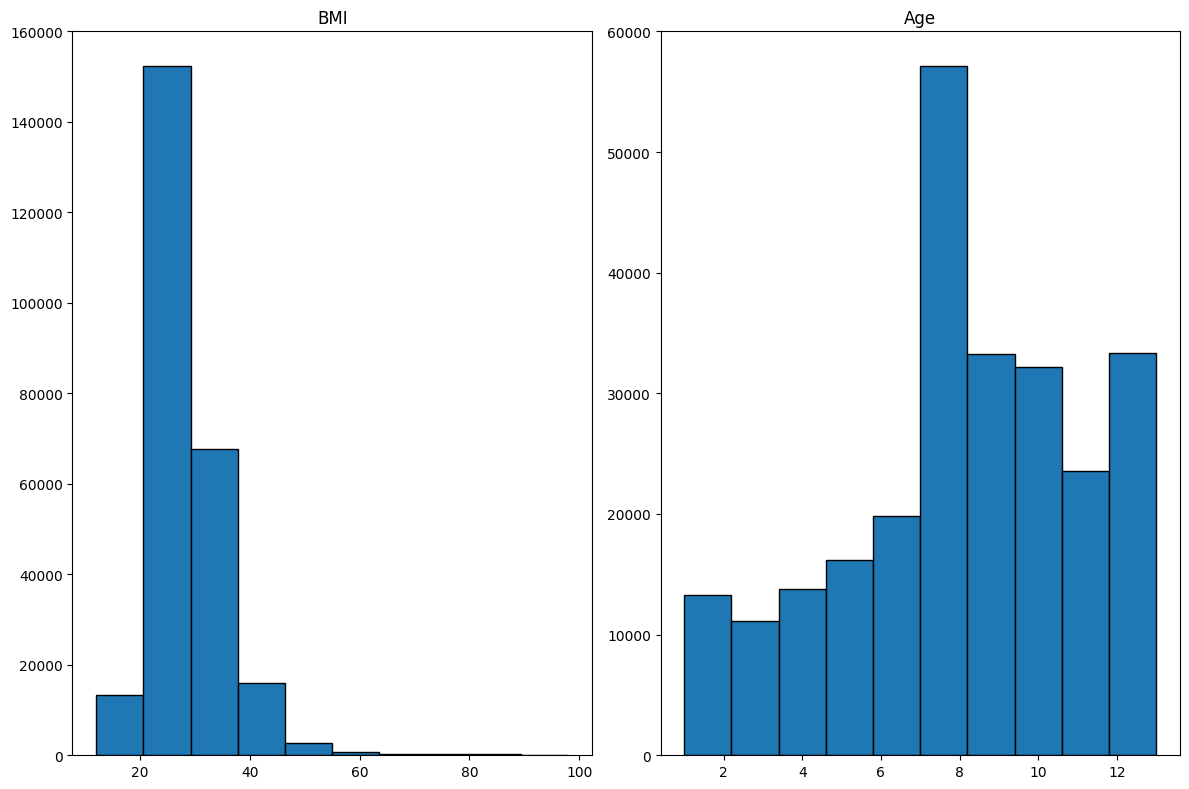

In [40]:
import matplotlib.pyplot as plt

cols = ['BMI', 'Age']

plt.figure(figsize=(12, 8))

for i, col in enumerate(cols):
    plt.subplot(1, 2, i + 1)
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()


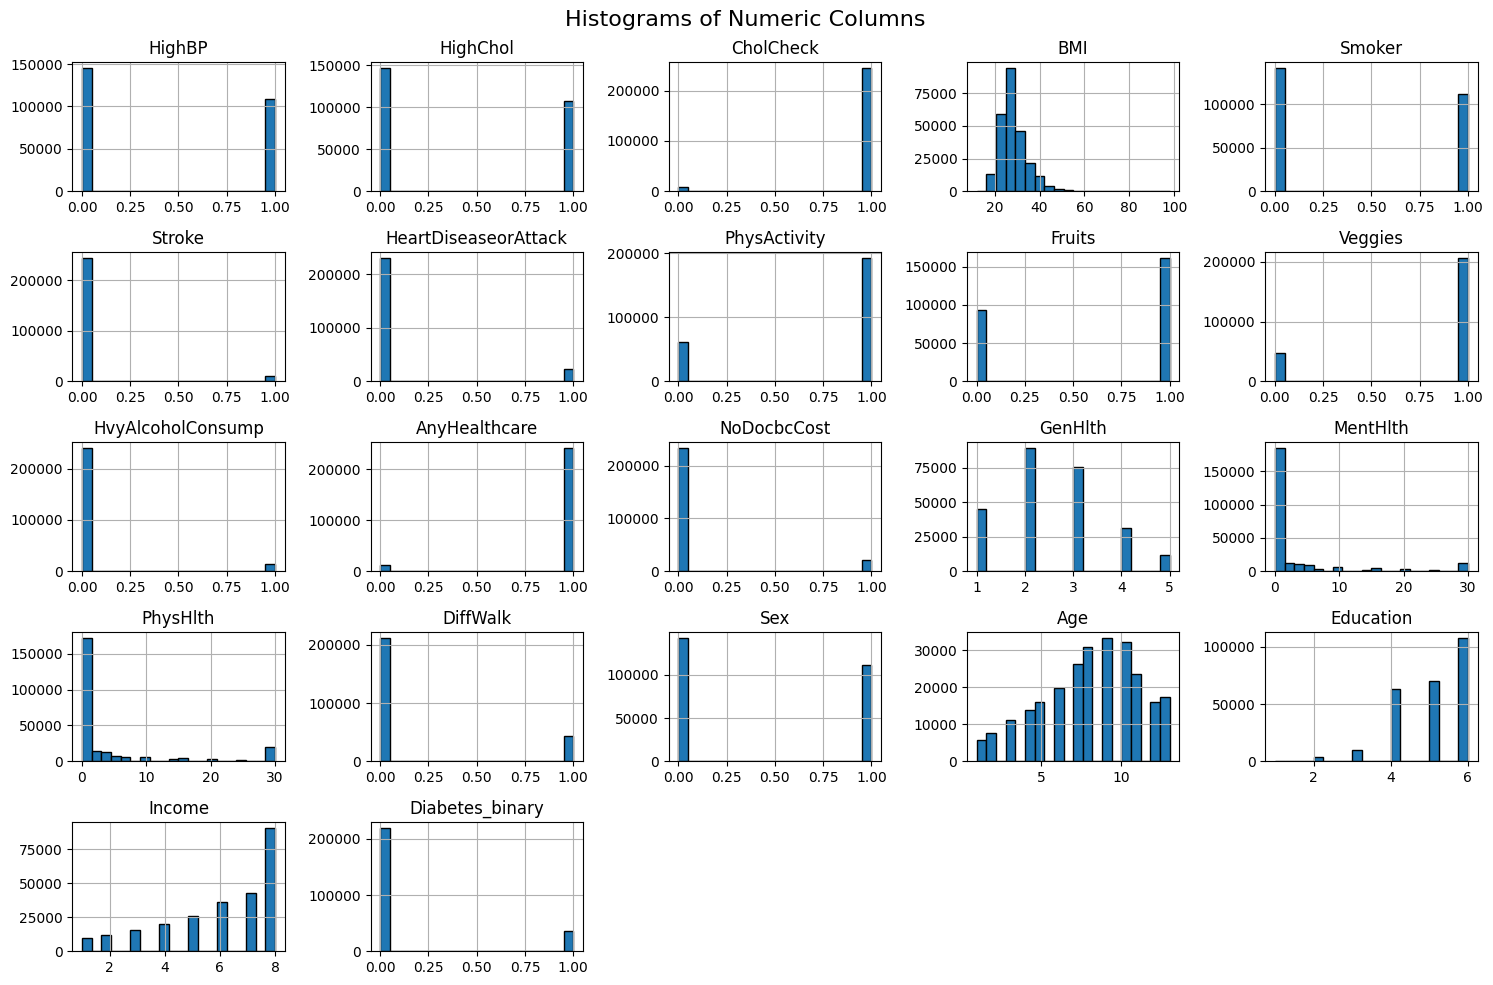

In [39]:
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()


## Not sure which features look most promising, but I want to see once balanced how history such as Heart Disease, Stroke,High Chol would be good for ML task